In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

In [3]:
data=pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
data.head(8)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [6]:
data.describe(include="all")

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25974,25974,25974,25974,25974,25974,25974,21861,5335,10757,...,634,592,4240,730,738,1021,667,2748,4543,378
unique,5410,12,6,67,8,16,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


In [7]:
data.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_8                           24953
Q38_B_Part_9                           25307
Q38_B_Part_10                          23226
Q38_B_Part_11                          21431
Q38_B_OTHER                            25596
Length: 369, dtype: int64

* **Starting with the first column, but as the time is not most considerable factor here, so we will leave it for now.**

In [8]:
data['Time from Start to Finish (seconds)']

0        Duration (in seconds)
1                          910
2                          784
3                          924
4                          575
                 ...          
25969                     1756
25970                      253
25971                      494
25972                      277
25973                      255
Name: Time from Start to Finish (seconds), Length: 25974, dtype: object

* **Starting with the age, we can calculate number users in each age distribution all around the world.**

In [9]:
data['Q1']

0        What is your age (# years)?
1                              50-54
2                              50-54
3                              22-24
4                              45-49
                    ...             
25969                          30-34
25970                          22-24
25971                          50-54
25972                          45-49
25973                          18-21
Name: Q1, Length: 25974, dtype: object

**Therefore we can distribute each age distribution to check the users in each age.**

In [10]:
age_groups=[
 '18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+',]
data.Q1[1:].value_counts()

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: Q1, dtype: int64

**Plotting each group distribution for the age**

Text(0, 0.5, 'Count')

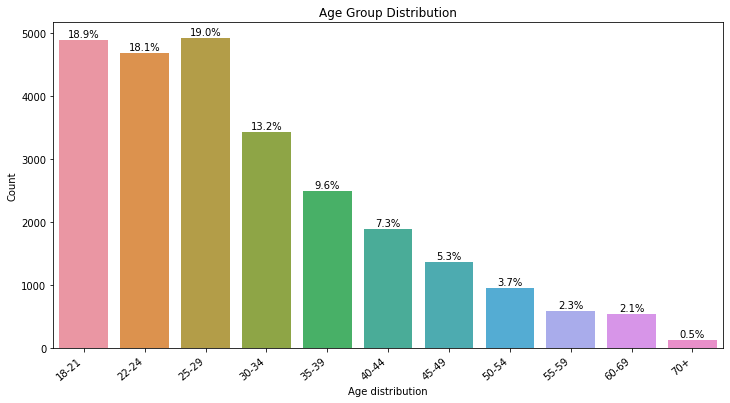

In [11]:
counts = []
for i in age_groups: 
    counts.append(data.Q1[1:].value_counts()[i])
plt.figure(figsize=(12,6))
ax =sns.countplot(x='Q1',data=data,order = age_groups)
ax.set_xticklabels(age_groups,rotation=40,ha="right")
plt.title("Age Group Distribution")
total= len(data.Q1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xlabel('Age distribution')
plt.ylabel('Count')

***Here we can see that there are more number of users at the age between 25-29, then 18-19, or we can say that the group of age between 18-30 have the maximum number of kaggle users.*** 

***We can also count the total number of users between 18-29 by splitting the age group into two groups, one from 18-29 and other 30+***

In [12]:
ageunder_30=data['Q1'][1:].value_counts()['18-21'] + data['Q1'][1:].value_counts()['22-24']+data['Q1'][1:].value_counts()['25-29']

In [13]:
ageunder_30

14526

In [14]:
((ageunder_30/len(data))*100)

55.92515592515592

In [15]:
ageover_30=data['Q1'][1:].value_counts()['30-34'] + data['Q1'][1:].value_counts()['40-44']+data['Q1'][1:].value_counts()['45-49']+data['Q1'][1:].value_counts()['50-54']+data['Q1'][1:].value_counts()['55-59']+data['Q1'][1:].value_counts()['60-69']

In [16]:
((ageover_30/len(data))*100)

33.93778393778394

In [17]:
ageover_30

8815

***So there are "14526" or above 50% kaggle users that have the age between 18-29, and "8815" or 30% of Kaggle users that have the age between 30-70***

* **Now we will calculate the users with different Genders**

In [18]:
gender =data["Q2"].unique()[1:].tolist()

In [19]:
male=data[data['Q2']=='Man']
male['Q1'].value_counts()

25-29    3859
18-21    3696
22-24    3643
30-34    2765
35-39    1993
40-44    1537
45-49    1171
50-54     811
55-59     509
60-69     504
70+       110
Name: Q1, dtype: int64

In [20]:
female=data[data['Q2']=='Woman']
female["Q1"].value_counts()

18-21    1117
25-29     994
22-24     963
30-34     618
35-39     455
40-44     317
45-49     175
50-54     136
55-59      72
60-69      35
70+         8
Name: Q1, dtype: int64

In [21]:
counts_male = []
for i in age_groups: 
    counts_male.append(male.Q1.value_counts()[i])
counts_male

[3696, 3643, 3859, 2765, 1993, 1537, 1171, 811, 509, 504, 110]

In [22]:
counts_female = []
for i in age_groups: 
    counts_female.append(female.Q1.value_counts()[i])
counts_female

[1117, 963, 994, 618, 455, 317, 175, 136, 72, 35, 8]

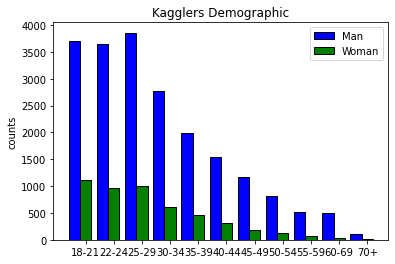

In [23]:
barWidth = 0.4
bar1=counts_male
bar2=counts_female
# The x position of bars
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bar1, width = 0.4, color = 'blue', edgecolor = 'black', capsize=7, label='Man')
 
plt.bar(r2, bar2, width = 0.4, color = 'green', edgecolor = 'black',capsize=7, label='Woman')


plt.xticks([r + barWidth for r in range(len(age_groups))], age_groups)
plt.ylabel('counts')
plt.legend()
 
plt.title("Kagglers Demographic")
# Show graphic
plt.show()

In [24]:
def count_people(country,gender):
    country_df=data[(data.Q3==country) & (data.Q2==gender)]
    counts_country = []
    for i in age_groups:
        counts_country.append(country_df.Q1.value_counts()[i])
    return counts_country

In [25]:
def count_people(country,gender):
    country_df=data[(data.Q3==country) & (data.Q2==gender)]
    counts_country = []
    for i in age_groups: 
                try:
                    counts_country.append(country_df.Q1.value_counts()[i])
                except:
                    counts_country.append(0)
    return counts_country

def make_bargraph(country):
    # width of the bars
    barWidth = 0.3
    bar1=count_people(country,'Man')
    bar2=count_people(country,'Woman')
    # The x position of bars
    r1 = np.arange(len(bar1))
    r2 = [x + barWidth for x in r1]
 
    plt.bar(r1, bar1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Male')
 

    plt.bar(r2, bar2, width = barWidth, color = 'green', edgecolor = 'black',capsize=7, label='Female')
 
    # general layout
    plt.xticks([r + barWidth for r in range(len(age_groups))], age_groups, rotation=90)
    plt.ylabel('counts')
    plt.legend()
 
    plt.title("Kagglers Demographic in " + str(country))
    # Show graphic
    plt.show()

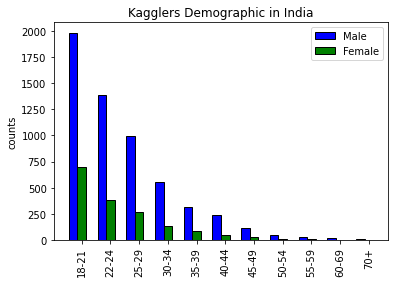

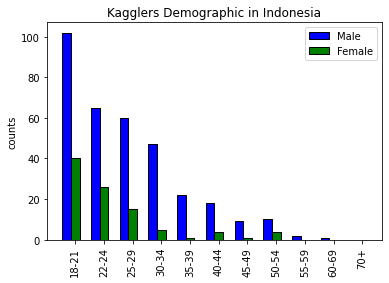

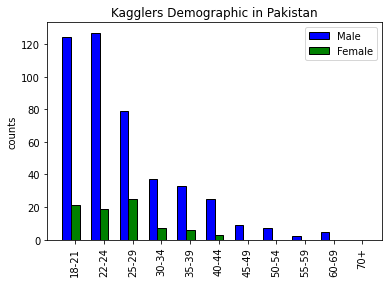

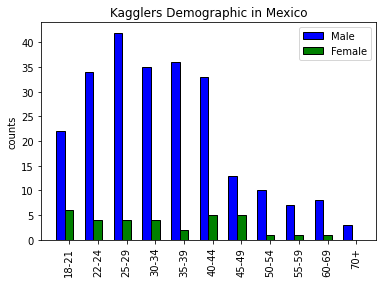

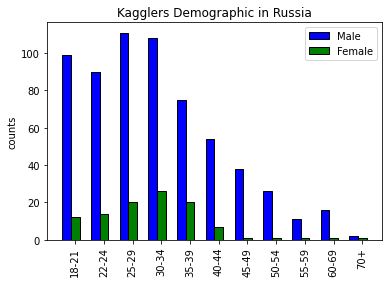

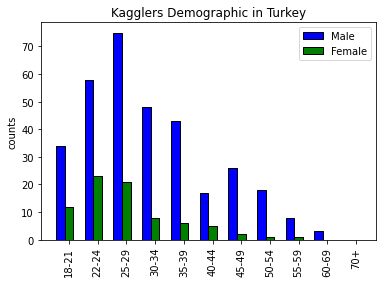

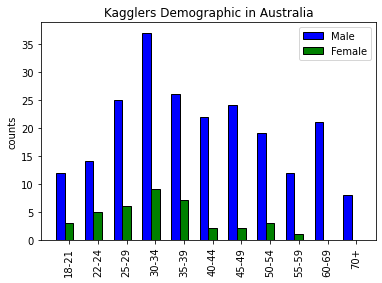

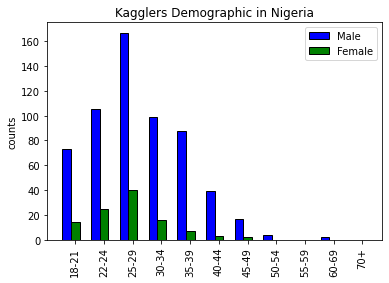

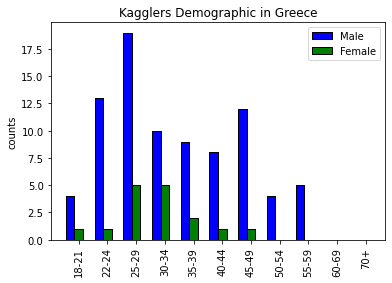

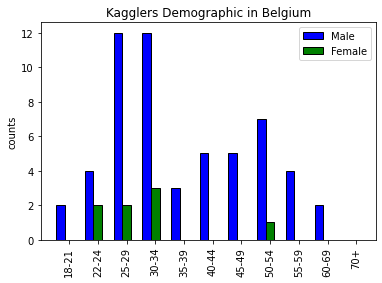

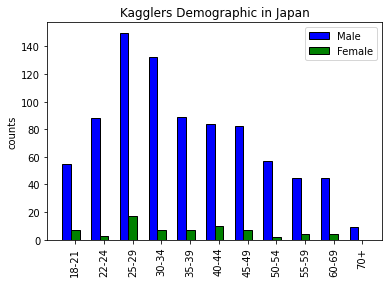

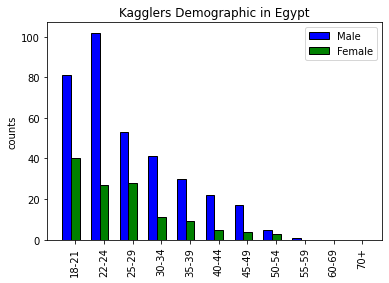

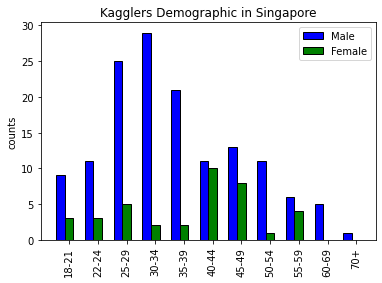

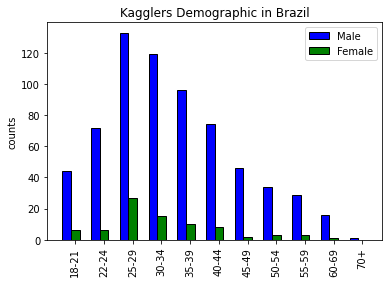

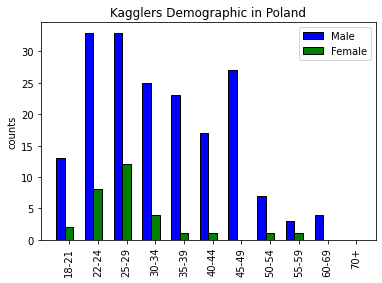

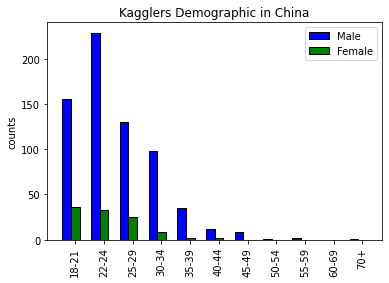

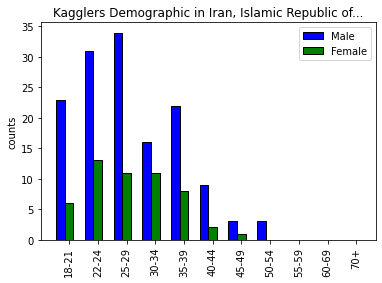

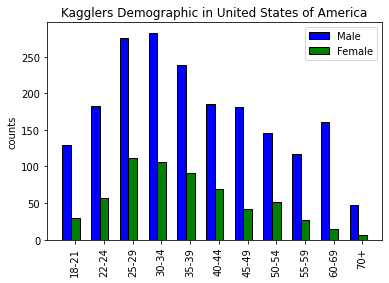

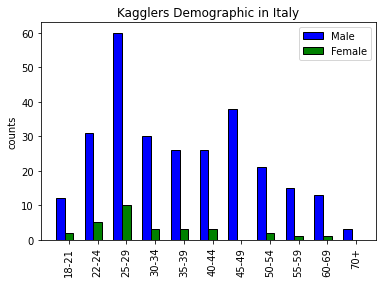

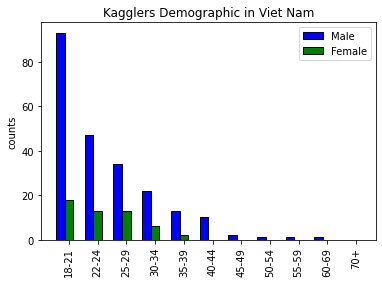

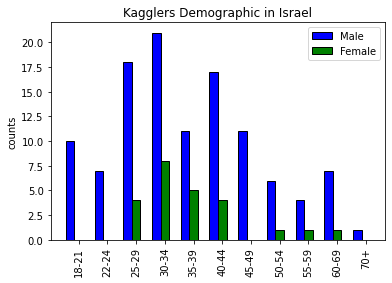

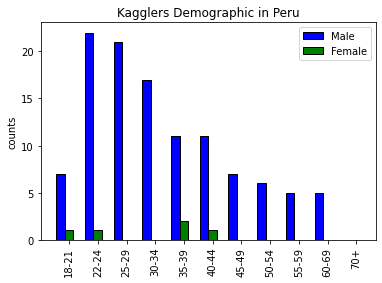

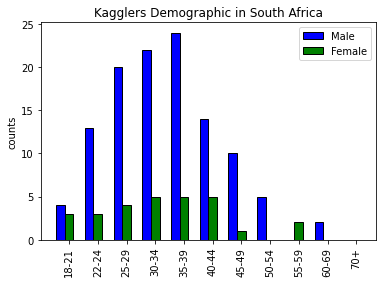

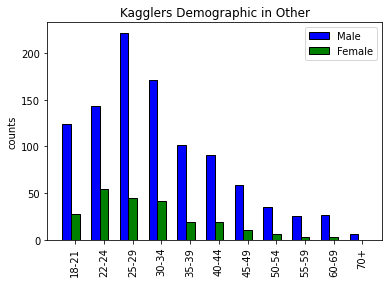

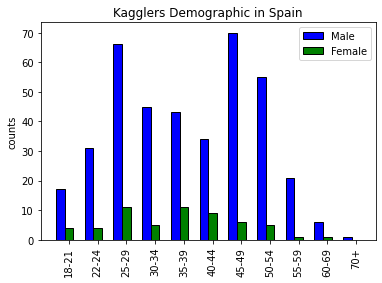

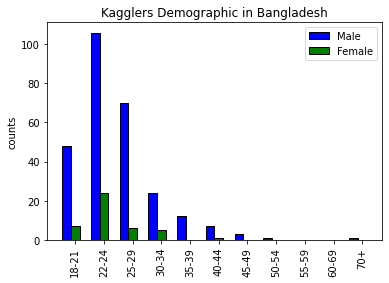

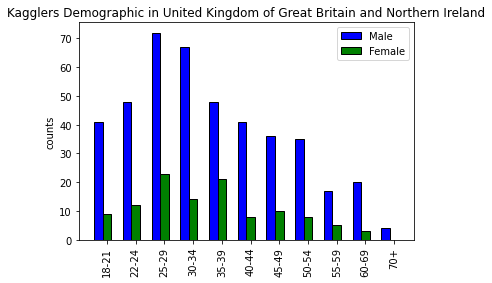

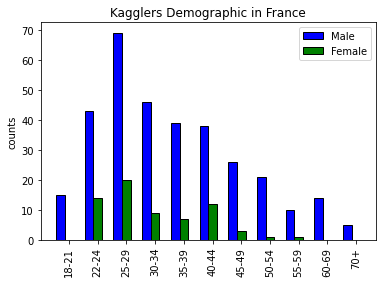

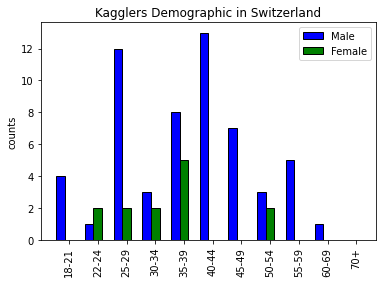

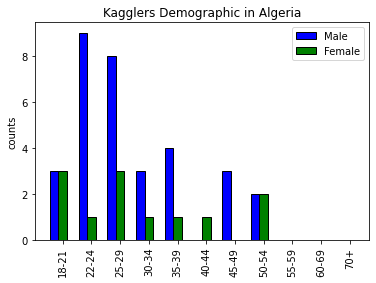

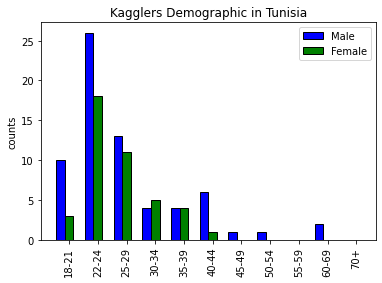

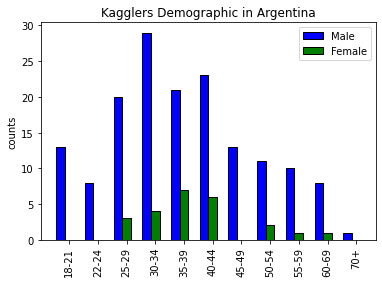

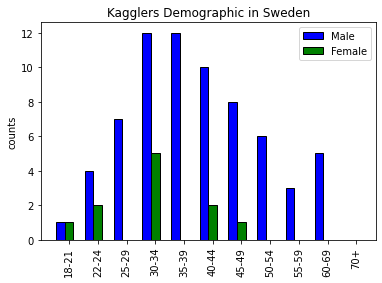

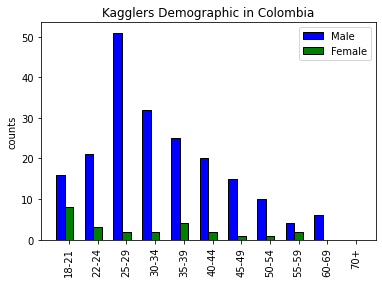

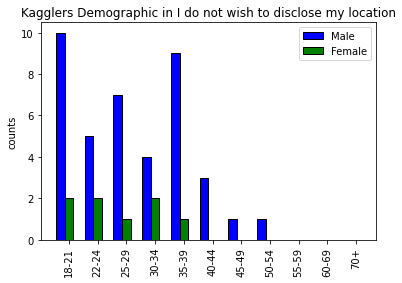

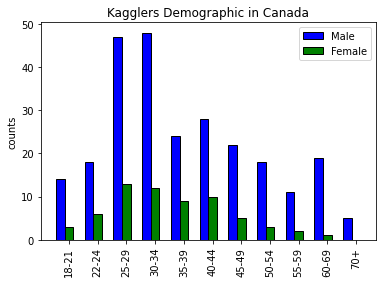

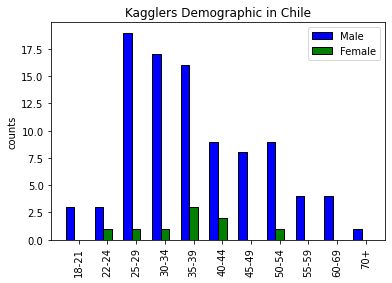

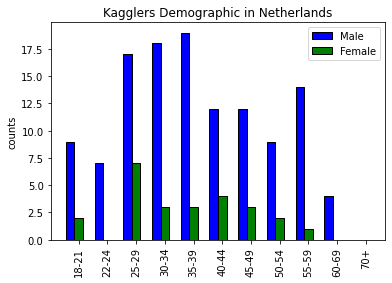

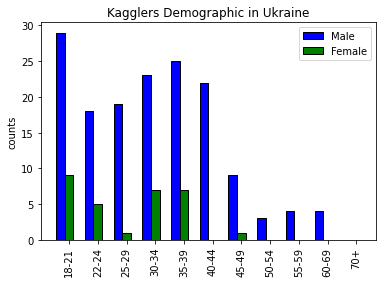

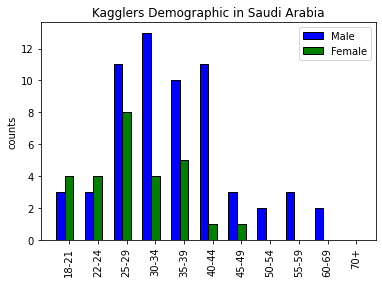

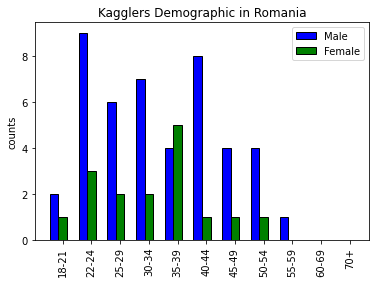

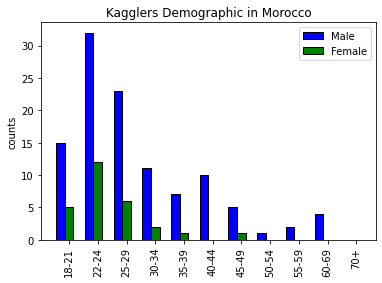

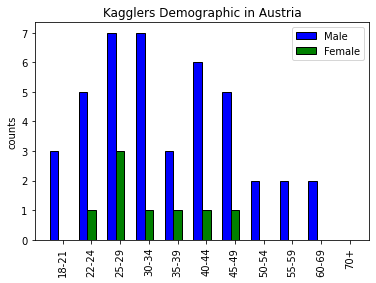

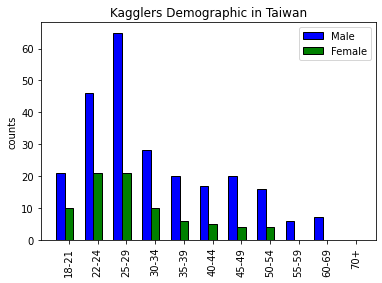

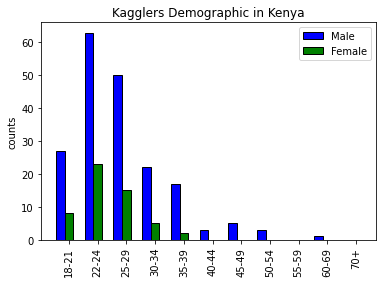

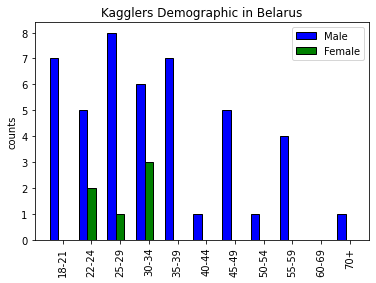

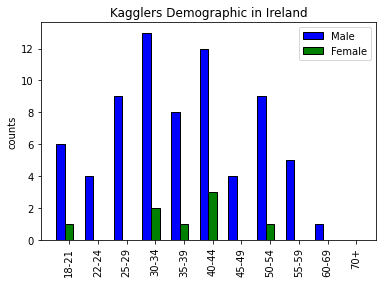

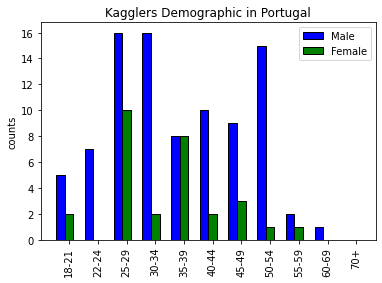

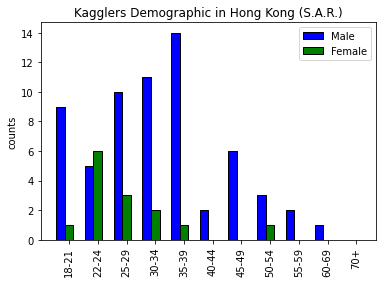

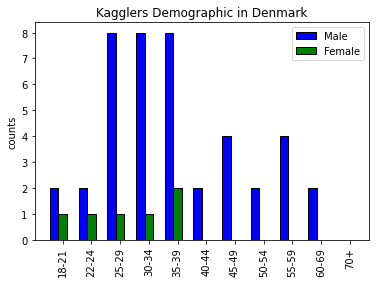

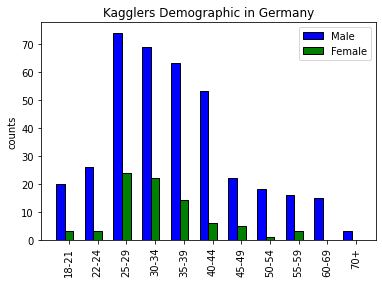

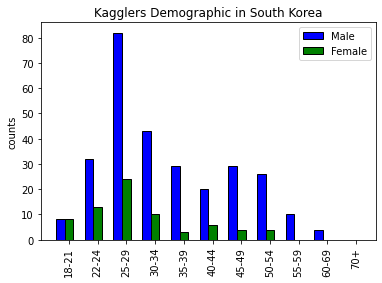

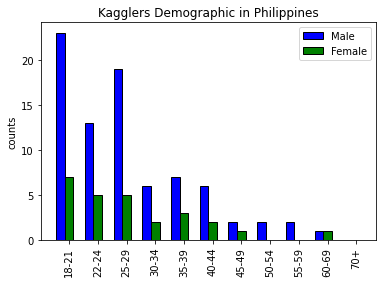

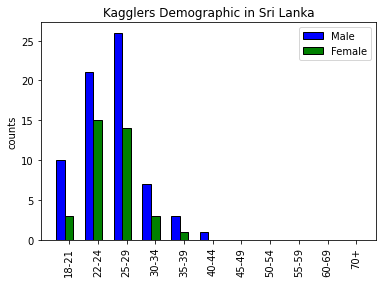

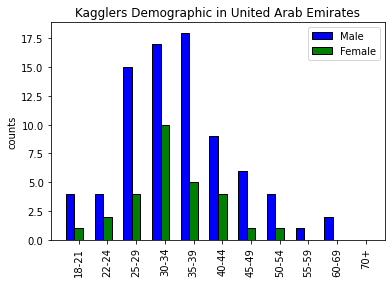

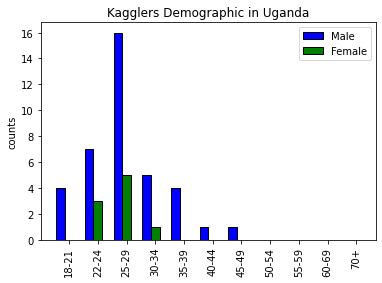

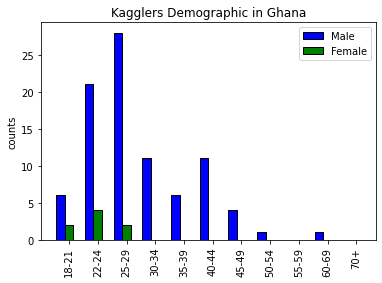

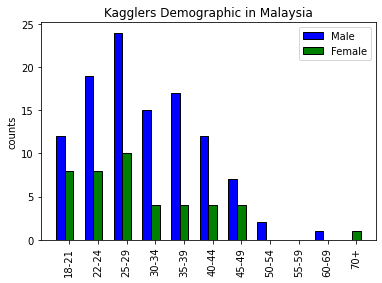

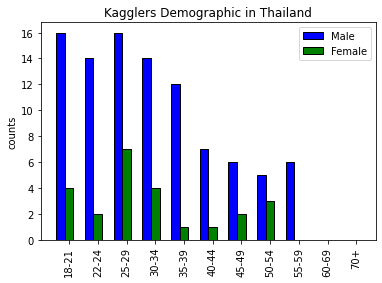

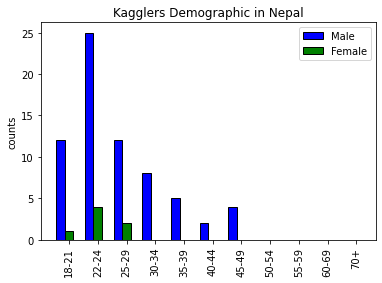

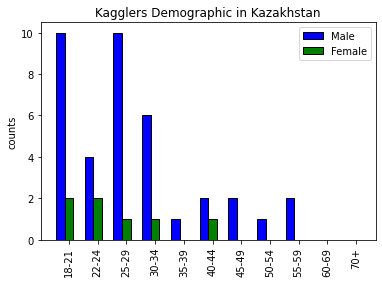

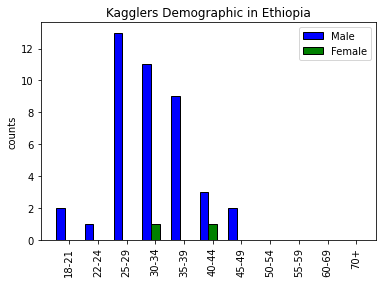

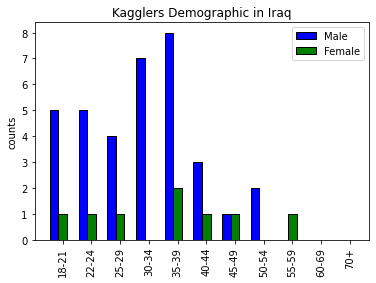

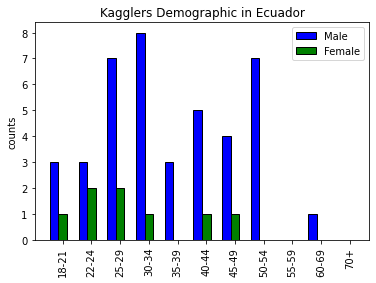

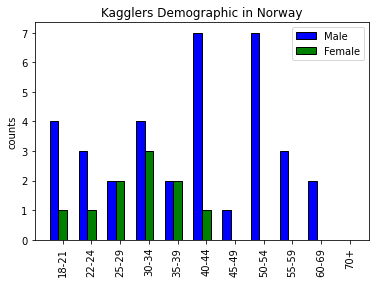

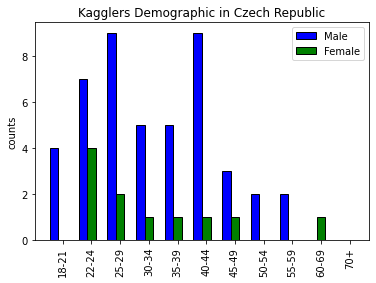

In [26]:
countries=data.Q3.unique()[1:].tolist()
for i in countries:
    make_bargraph(i)

In [27]:
counts_1= []
for i in gender:
    counts_1.append(data["Q2"][1:].value_counts()[i])

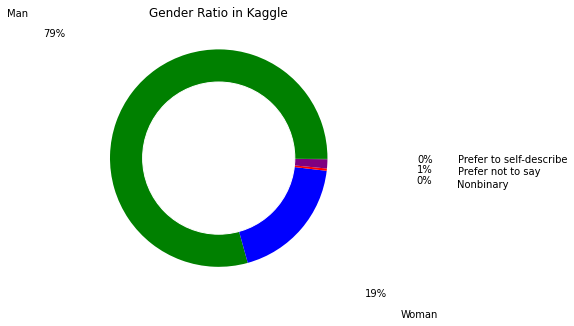

In [28]:
fig=plt.figure(figsize=(5,5))
plot=plt.Circle((0,0),0.7,color='white')
plt.pie(counts_1,labels = gender, colors =['green','blue','red','purple'],
        labeldistance=2.2,autopct='%1.0f%%',pctdistance=1.9)
p=plt.gcf()
p.gca().add_artist(plot)
plt.title("Gender Ratio in Kaggle")
plt.show()

***From the donut diagram we can conclude that there are 79% Mens are Kaggle User, 19% Women.***

# Calculating the number of users in each country Finding the most user in each country.

In [29]:
users=data['Q3'][1:].value_counts()[:]

In [30]:
users

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: Q3, Length: 66, dtype: int64

In [31]:
max(users)

7434

In [32]:
min(users)

43

In [33]:
countries =data['Q3'].unique()[1:].tolist()

In [34]:
countries

['India',
 'Indonesia',
 'Pakistan',
 'Mexico',
 'Russia',
 'Turkey',
 'Australia',
 'Nigeria',
 'Greece',
 'Belgium',
 'Japan',
 'Egypt',
 'Singapore',
 'Brazil',
 'Poland',
 'China',
 'Iran, Islamic Republic of...',
 'United States of America',
 'Italy',
 'Viet Nam',
 'Israel',
 'Peru',
 'South Africa',
 'Other',
 'Spain',
 'Bangladesh',
 'United Kingdom of Great Britain and Northern Ireland',
 'France',
 'Switzerland',
 'Algeria',
 'Tunisia',
 'Argentina',
 'Sweden',
 'Colombia',
 'I do not wish to disclose my location',
 'Canada',
 'Chile',
 'Netherlands',
 'Ukraine',
 'Saudi Arabia',
 'Romania',
 'Morocco',
 'Austria',
 'Taiwan',
 'Kenya',
 'Belarus',
 'Ireland',
 'Portugal',
 'Hong Kong (S.A.R.)',
 'Denmark',
 'Germany',
 'South Korea',
 'Philippines',
 'Sri Lanka',
 'United Arab Emirates',
 'Uganda',
 'Ghana',
 'Malaysia',
 'Thailand',
 'Nepal',
 'Kazakhstan',
 'Ethiopia',
 'Iraq',
 'Ecuador',
 'Norway',
 'Czech Republic']

In [35]:
data["Q3"].value_counts()['India']/data.Q3[1:].count()

0.28622030570207524

* **From the numbers, "India" has the maximum number of Kaggle users and "Iraq & Ethopia" have the minimum number of Kaggle Users.**

* **We can map a Treemap to view the users in each contry**

In [36]:
counts_2= []
for i in countries:
    counts_2.append(data['Q3'][1:].value_counts()[i])

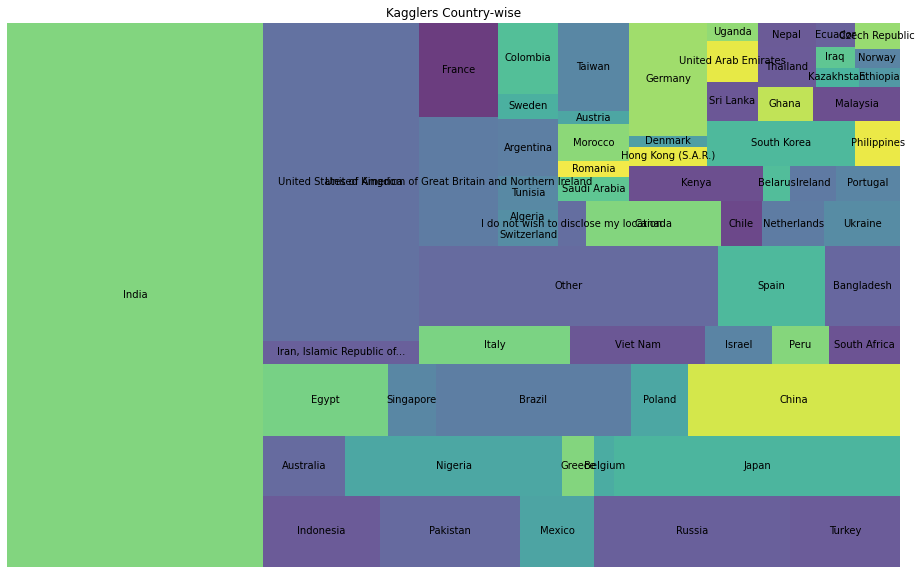

In [37]:
import squarify 
fig=plt.figure(figsize=(16,10))
squarify.plot(sizes=counts_2,label=countries,alpha=.8)
plt.axis('off')
plt.title('Kagglers Country-wise')
plt.show()

In [38]:
(data['Q3'].value_counts()['Japan'] - data[(data['Q1']=='18-21')|(data['Q1']=='22-24')|(data["Q1"]=='25-29')]['Q3'].value_counts()['Japan'])/data["Q3"].value_counts()['Japan']

0.6460369163952225

* **Checking the highest level of education for Kaggle Users**

In [39]:
def to_list(column):
    ls = data[str(column)].unique()[1:].tolist()
    counts = []
    for i in ls:
        counts.append(data[str(column)][1:].value_counts()[i])
    return counts,ls
def make_piechart(column):
    fig=plt.figure(figsize=(5,5))
    my_circle =plt.Circle((0,0),0.7,color='white')

    plt.pie(to_list(column)[0],labels = to_list(column)[1],labeldistance=2.2,autopct='%1.0f%%',pctdistance=1.9)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(data[str(column)][0],x=0.5,y=1.5)
    plt.show()

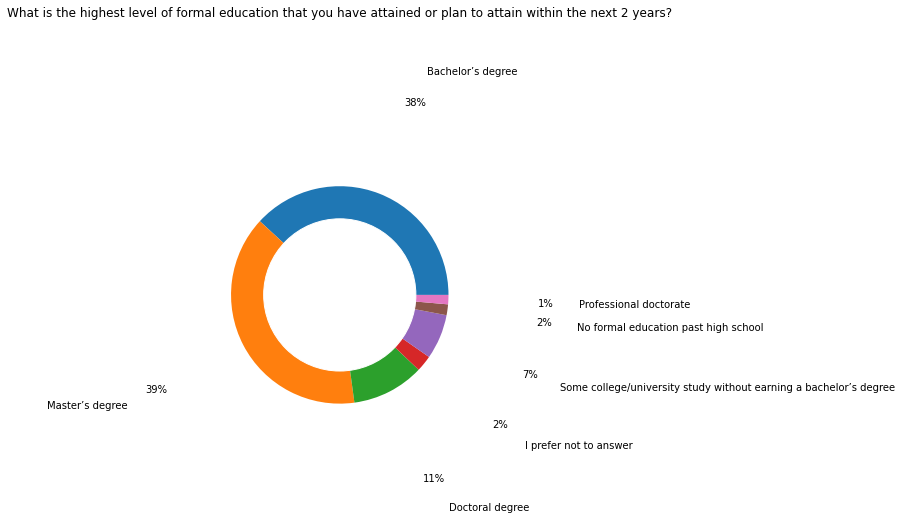

In [40]:
make_piechart('Q4')

**From the Donut chart we can insight that there are 39% of Kaggle users are with Masters Degree or persuing Masters Degree and 38% have the Bachler's Degree and other eduaction degrees.**

* **Users with the roles that use Kaggle**

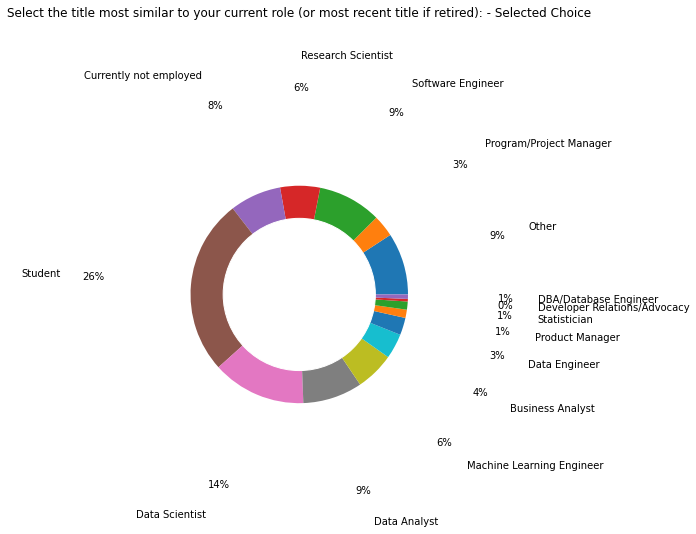

In [41]:
make_piechart('Q5')

* **Most kagglers are student with the ratio of 26%, with the Data scientists 14%, Therefore we can conclude that Data passionates are the ones that use Kaggle most time with professionals having data scientists, data analyst, machine learning and students mostly want to persue their career as data passionats.**

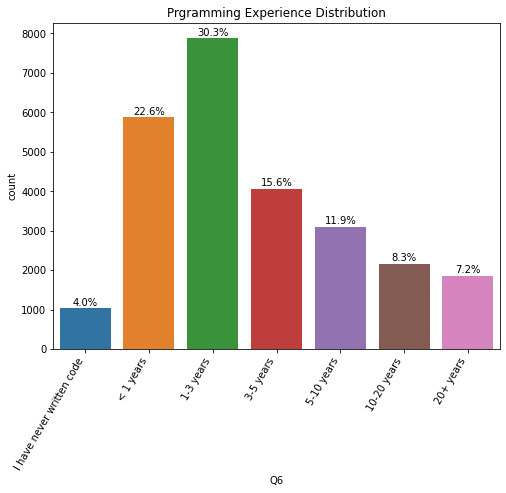

In [42]:
experiences = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']

plt.figure(figsize=(8,6))
ax =sns.countplot(x='Q6',data=data,order = experiences)
ax.set_xticklabels(experiences,rotation=60,ha="right")
plt.title("Prgramming Experience Distribution")
total= len(data.Q6)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Programming Languages Experience** 

* **Kaggle Users with different programming backgrounds**

In [43]:
data.copy().dropna(subset=['Q8']).Q8.unique()[1:].tolist()

['Python',
 'SQL',
 'R',
 'MATLAB',
 'C',
 'Julia',
 'Other',
 'C++',
 'Javascript',
 'Java',
 'None',
 'Bash',
 'Swift']

In [44]:
languages =data.copy().dropna(subset=['Q8']).Q8.unique()[1:].tolist()
counts_4 = []
for i in languages:
    counts_4.append(data.Q8[1:].value_counts()[i])
counts_4

[20213, 1338, 1445, 215, 440, 137, 176, 437, 133, 242, 111, 38, 15]

In [45]:
languages = ['Python','R','SQL','C','C++','Java',"Javascript","Julia","Swift","Bash","Matalab"]
python=data.Q7_Part_1.value_counts()[0]
r= data.Q7_Part_2.value_counts()[0]
sql=data.Q7_Part_3.value_counts()[0]
c=data.Q7_Part_4.value_counts()[0]
c_plus =data.Q7_Part_5.value_counts()[0]
java = data.Q7_Part_6.value_counts()[0]
javascript=data.Q7_Part_7.value_counts()[0]
julia = data.Q7_Part_8.value_counts()[0]
swift = data.Q7_Part_9.value_counts()[0]
bash = data.Q7_Part_10.value_counts()[0]
matlab = data.Q7_Part_11.value_counts()[0]
values = [python,r,sql,c,c_plus,java,javascript,julia,swift,bash,matlab]

* **Most Kagglers use Python Programming**

Text(0.5, 1.0, 'Regulary Used Programming Language')

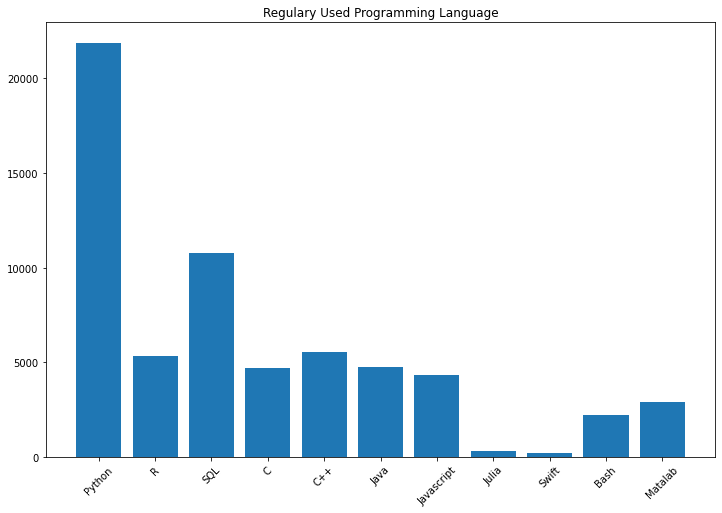

In [46]:
plt.figure(figsize=(12,8))
plt.bar(languages,[python,r,sql,c,c_plus,java,javascript,julia,swift,bash,matlab])
plt.xticks(rotation=45)
plt.title("Regulary Used Programming Language")

Text(0.5, 1.2, 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice')

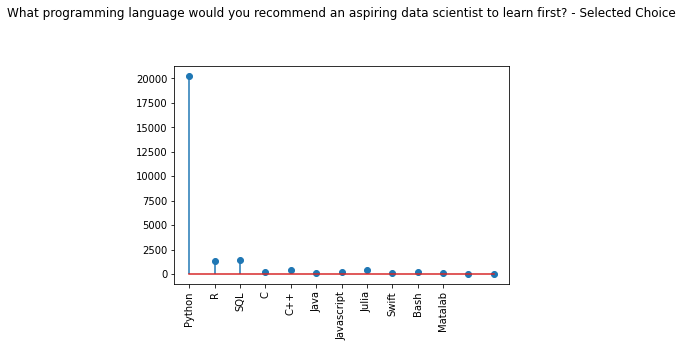

In [47]:
plt.stem(counts_4)
plt.xticks(range(len(languages)),languages,rotation='vertical')
plt.title(str(data.Q8[0]),y=1.2)

In [48]:
20213/sum(counts_4)

0.8104651162790698

* **The industry that use kaggle**

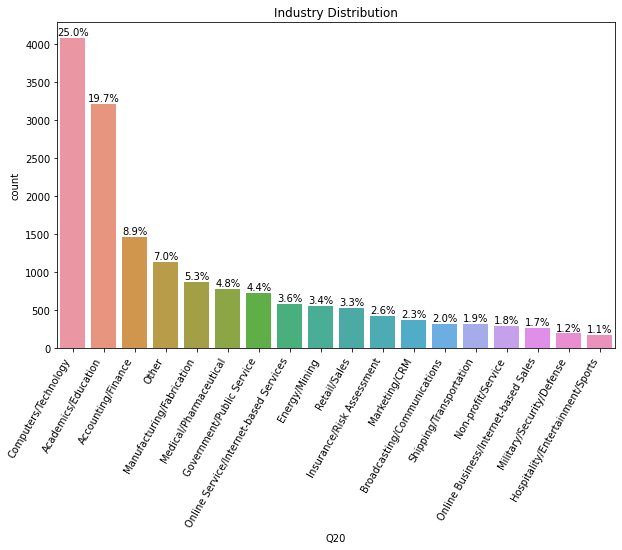

In [49]:
industry = data.copy().dropna(subset=['Q20'])
plt.figure(figsize=(10,6))
ax =sns.countplot(x='Q20',data=industry,order = industry["Q20"].value_counts().index[:-1])
ax.set_xticklabels(industry["Q20"].value_counts().index[:-1],rotation=60,ha="right")
plt.title("Industry Distribution")
total= len(industry.Q20)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Industory distribution of all Kagglers vs genders**

Text(0.5, 1.0, 'Industry Distribution')

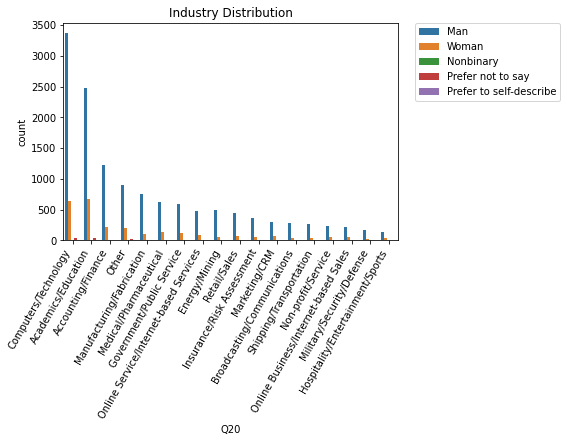

In [50]:
ax =sns.countplot(x='Q20',data=industry,order = industry["Q20"].value_counts().index[:-1],hue = industry.Q2[1:])
ax.set_xticklabels(industry["Q20"].value_counts().index[:-1],rotation=60,ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Industry Distribution")

In [51]:
total =len(industry.Q20)
industry.Q20.value_counts()[:-1]/total

Computers/Technology                      0.249847
Academics/Education                       0.196864
Accounting/Finance                        0.089367
Other                                     0.069582
Manufacturing/Fabrication                 0.053412
Medical/Pharmaceutical                    0.047532
Government/Public Service                 0.044469
Online Service/Internet-based Services    0.035832
Energy/Mining                             0.034179
Retail/Sales                              0.032831
Insurance/Risk Assessment                 0.025971
Marketing/CRM                             0.022847
Broadcasting/Communications               0.019968
Shipping/Transportation                   0.019356
Non-profit/Service                        0.018376
Online Business/Internet-based Sales      0.016844
Military/Security/Defense                 0.012067
Hospitality/Entertainment/Sports          0.010597
Name: Q20, dtype: float64

In [52]:
company_size = data.copy().dropna(subset=['Q21','Q22'])
sizes =['0-49 employees','50-249 employees','250-999 employees', '1000-9,999 employees',
       '10,000 or more employees']
scientist = ['0','1-2','3-4','5-9','10-14','15-19','20+']
company_size['Q22'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       '3-4', '1-2', '0', '5-9', '10-14', '20+', '15-19'], dtype=object)

Text(0.5, 1.0, 'Company Size and Number of Data Scientist')

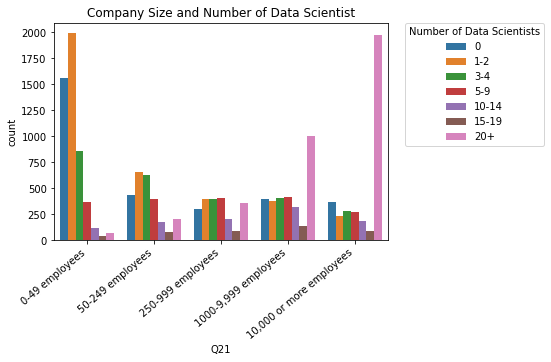

In [53]:
ax =sns.countplot(x='Q21',data=company_size,order = sizes,hue = industry.Q22[1:],hue_order=scientist)
ax.set_xticklabels(sizes,rotation=40,ha="right")
plt.legend(title='Number of Data Scientists',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Company Size and Number of Data Scientist")

* **Number of data scientists in each industory**

Text(0.5, 1.0, 'Company Size and Number of Data Scientist(Computers/Technology)')

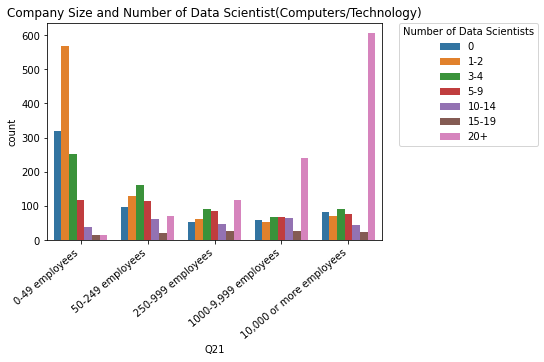

In [54]:
ax =sns.countplot(x='Q21',data=company_size[company_size.Q20=='Computers/Technology'],order = sizes,hue = industry.Q22[1:],hue_order=scientist)
ax.set_xticklabels(sizes,rotation=40,ha="right")
plt.legend(title='Number of Data Scientists',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Company Size and Number of Data Scientist(Computers/Technology)")

Text(0.5, 1.0, 'Company Size and Number of Data Scientist(Academics/Education)')

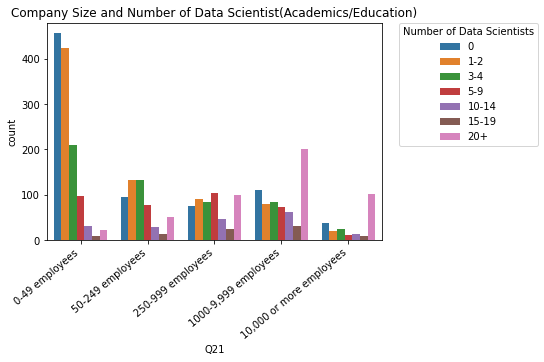

In [55]:
ax =sns.countplot(x='Q21',data=company_size[company_size.Q20=='Academics/Education'],order = sizes,hue = industry.Q22[1:],hue_order=scientist)
ax.set_xticklabels(sizes,rotation=40,ha="right")
plt.legend(title='Number of Data Scientists',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Company Size and Number of Data Scientist(Academics/Education)")

Text(0.5, 1.0, 'Company Size and Number of Data Scientist(Accounting/Finance)')

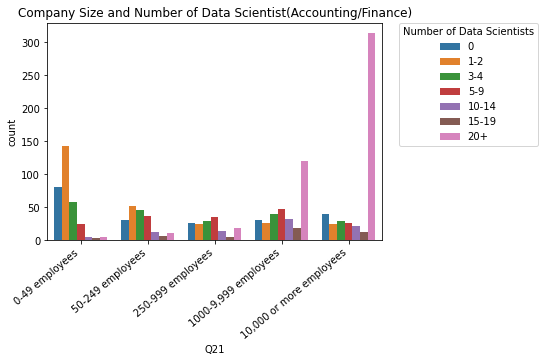

In [56]:
ax =sns.countplot(x='Q21',data=company_size[company_size.Q20=='Accounting/Finance'],order = sizes,hue = industry.Q22[1:],hue_order=scientist)
ax.set_xticklabels(sizes,rotation=40,ha="right")
plt.legend(title='Number of Data Scientists',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Company Size and Number of Data Scientist(Accounting/Finance)")

In [57]:
data.Q25.unique()

salaries_bucket = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999',
                   '10,000-14,999','15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999',
                   '50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999',
                   '125,000-149,999','150,000-199,999','200,000-249,999','250,000-299,999','300,000-499,999',
                   '$500,000-999,999','>$1,000,000']

* **Salaries distribution of Kaggle Users**

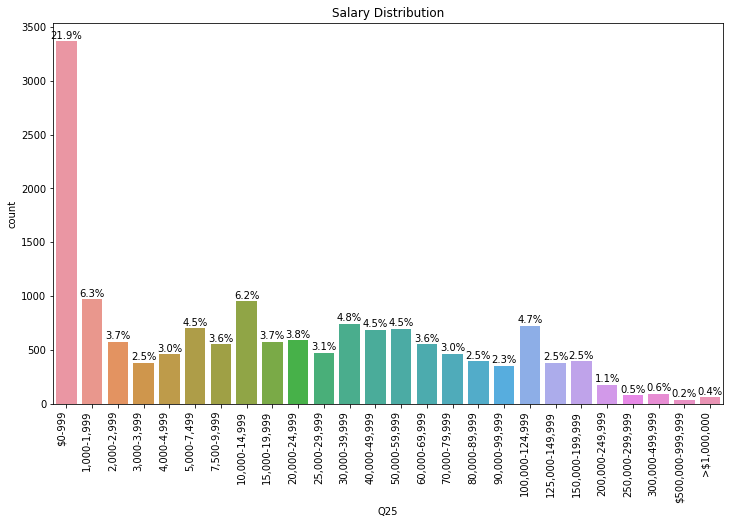

In [58]:
salaries = data.copy().dropna(subset=['Q25'])
plt.figure(figsize=(12,7))
ax =sns.countplot(x='Q25',data=salaries,order = salaries_bucket)
ax.set_xticklabels(salaries_bucket,rotation=90,ha="right")
plt.title("Salary Distribution")

total= len(salaries.Q20)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Calculating the number of users in *Pakistan*.

* **Ratio of Pakistanis in Kaggle users in overall world**

In [59]:
data["Q3"].value_counts()['Pakistan']/data.Q3[1:].count()

0.02040580602933816

* **Number of Kaggle users in Pakistan**

In [60]:
Pakistan= data[data['Q3']=='Pakistan']
Pakistan.Q1.value_counts().sum()

530

In [61]:
Pakistan= data[data['Q3']=='Pakistan']

* **Age distribution of kaggle Pakistani User**

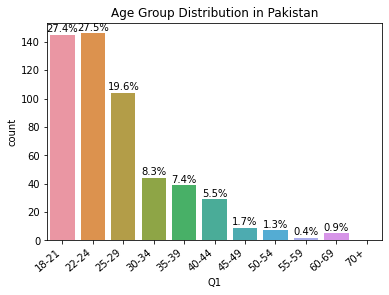

In [62]:
ax =sns.countplot(x='Q1',data=Pakistan,order = age_groups)
ax.set_xticklabels(age_groups,rotation=40,ha="right")
plt.title("Age Group Distribution in Pakistan")
total= len(Pakistan.Q1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

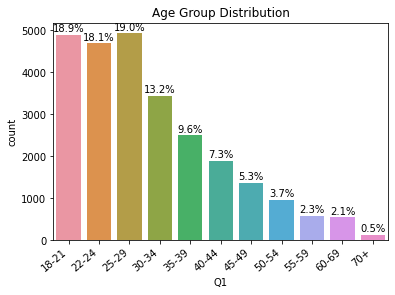

In [63]:
ax =sns.countplot(x='Q1',data=data,order = age_groups)
ax.set_xticklabels(age_groups,rotation=40,ha="right")
plt.title("Age Group Distribution")
total= len(data.Q1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Gender Distribution of Kagglers in Pakistan**

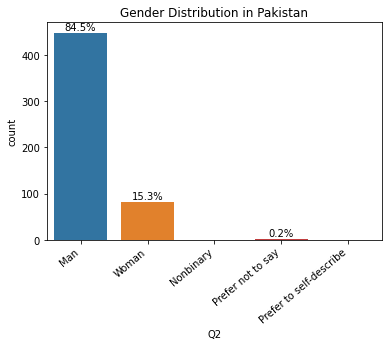

In [64]:
ax =sns.countplot(x='Q2',data=Pakistan,order = gender)
ax.set_xticklabels(gender,rotation=40,ha="right")
plt.title("Gender Distribution in Pakistan")
total= len(Pakistan.Q2)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Pakistani Kagglers Education distribution**

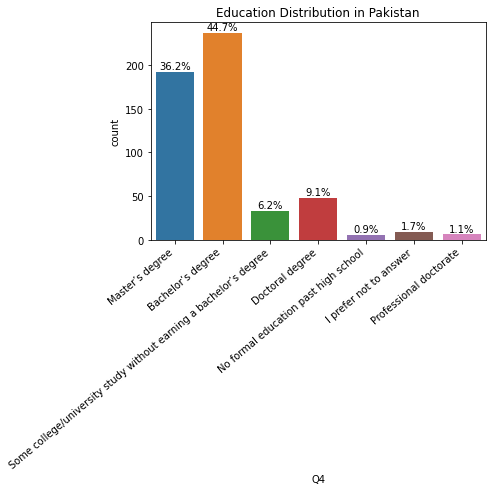

In [65]:
ax =sns.countplot(x='Q4',data=Pakistan,order =Pakistan.Q4.unique() )
ax.set_xticklabels(Pakistan.Q4.unique(),rotation=40,ha="right")
plt.title("Education Distribution in Pakistan")
total= len(Pakistan.Q4)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Pakistani Kagglers having professions**

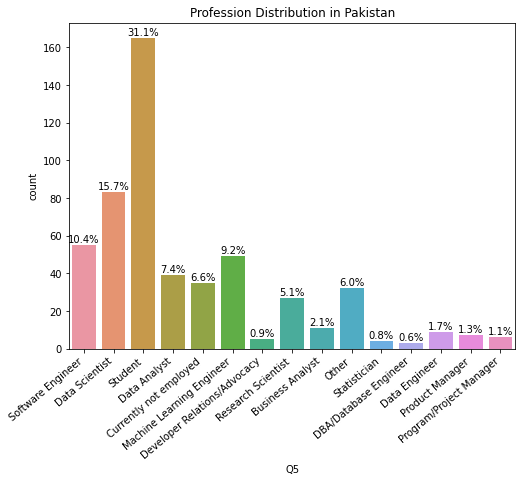

In [66]:
plt.figure(figsize=(8,6))
ax =sns.countplot(x='Q5',data=Pakistan,order = Pakistan.Q5.unique())
ax.set_xticklabels(Pakistan.Q5.unique(),rotation=40,ha="right")
plt.title("Profession Distribution in Pakistan")
total= len(Pakistan.Q5)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Pakistani Kagglers with different programming background**

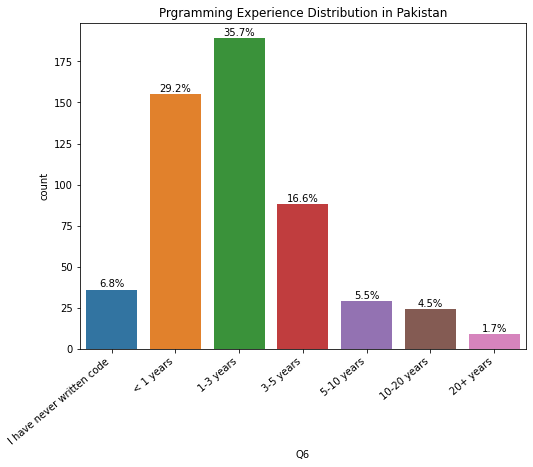

In [67]:
experiences = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']

plt.figure(figsize=(8,6))
ax =sns.countplot(x='Q6',data=Pakistan,order = experiences)
ax.set_xticklabels(experiences,rotation=40,ha="right")
plt.title("Prgramming Experience Distribution in Pakistan")
total= len(Pakistan.Q6)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

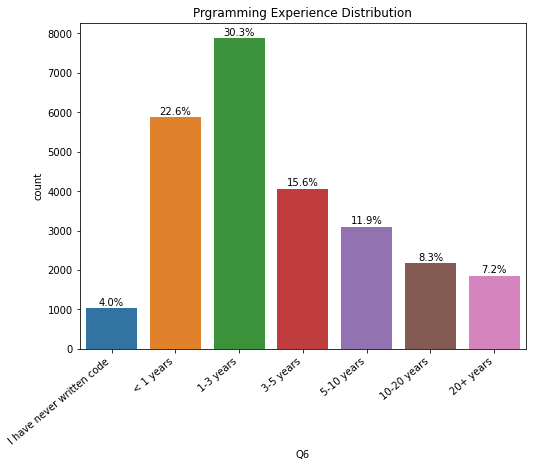

In [68]:
experiences = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']

plt.figure(figsize=(8,6))
ax =sns.countplot(x='Q6',data=data,order = experiences)
ax.set_xticklabels(experiences,rotation=40,ha="right")
plt.title("Prgramming Experience Distribution")
total= len(data.Q6)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [69]:
languages = ['Python','R','SQL','C','C++','Java',"Javascript","Julia","Swift","Bash","Matalab"]
python=Pakistan.Q7_Part_1.value_counts()[0]
r= Pakistan.Q7_Part_2.value_counts()[0]
sql=Pakistan.Q7_Part_3.value_counts()[0]
c=Pakistan.Q7_Part_4.value_counts()[0]
c_plus =Pakistan.Q7_Part_5.value_counts()[0]
java = Pakistan.Q7_Part_6.value_counts()[0]
javascript=Pakistan.Q7_Part_7.value_counts()[0]
julia = Pakistan.Q7_Part_8.value_counts()[0]
swift = Pakistan.Q7_Part_9.value_counts()[0]
bash = Pakistan.Q7_Part_10.value_counts()[0]
matlab = Pakistan.Q7_Part_11.value_counts()[0]
values_2 = [python,r,sql,c,c_plus,java,javascript,julia,swift,bash,matlab]

* **Programming Languages**

Text(0.5, 1.0, 'Regulary Used Programming Language in Pakistan')

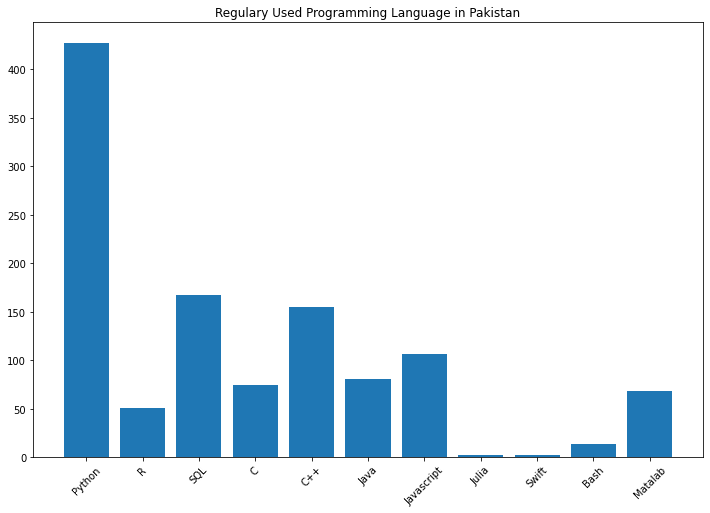

In [70]:
plt.figure(figsize=(12,8))
plt.bar(languages,values_2)
plt.xticks(rotation=45)
plt.title("Regulary Used Programming Language in Pakistan")

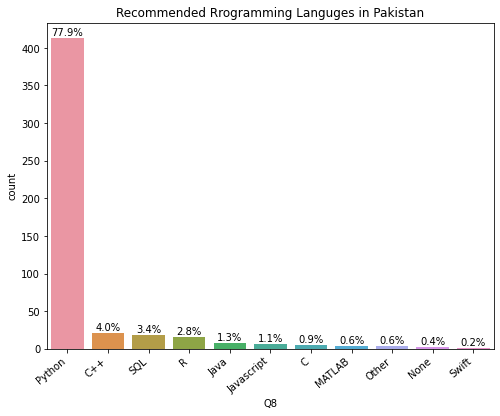

In [71]:
plt.figure(figsize=(8,6))
ax =sns.countplot(x='Q8',data=Pakistan,order = Pakistan.Q8.value_counts().index)
ax.set_xticklabels(Pakistan.Q8.value_counts().index,rotation=40,ha="right")
plt.title("Recommended Rrogramming Languges in Pakistan")
total= len(Pakistan.Q8)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [72]:
Pakistan.Q20

3                           Academics/Education
18                          Academics/Education
144                                         NaN
258                        Computers/Technology
270                         Academics/Education
                          ...                  
25834                             Energy/Mining
25880                                       NaN
25893                                       NaN
25917                        Accounting/Finance
25953    Online Service/Internet-based Services
Name: Q20, Length: 530, dtype: object

* **Pakistani Kagglers in their Profession Sectors**

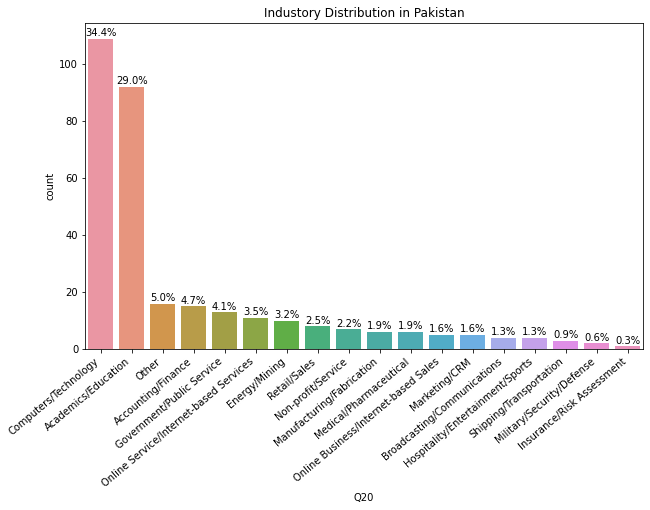

In [73]:
Pakistan_industory = Pakistan.copy().dropna(subset=['Q20'])

plt.figure(figsize=(10,6))
ax =sns.countplot(x='Q20',data=Pakistan_industory,order = Pakistan_industory.Q20.value_counts().index)
ax.set_xticklabels(Pakistan_industory.Q20.value_counts().index,rotation=40,ha="right")
plt.title("Industory Distribution in Pakistan")
total= len(Pakistan_industory.Q20)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

* **Salaries of Pakistani Kagglers**

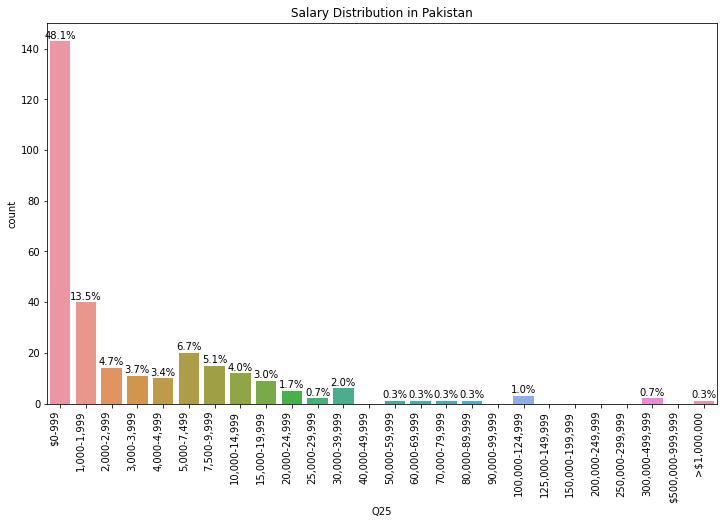

In [74]:
plt.figure(figsize=(12,7))
salaries = data.copy().dropna(subset=['Q25'])
ax =sns.countplot(x='Q25',data=salaries[(salaries.Q3=='Pakistan')],order = salaries_bucket)
ax.set_xticklabels(salaries_bucket,rotation=90,ha="right")
plt.title("Salary Distribution in Pakistan")

total= len(salaries[(salaries.Q3=='Pakistan')].Q20)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')